# Abstract

Every day I pursue a small **win** in one of the areas of my life that I identify as a **priority**. For example: "prog", "travel", "sport", or "social".

In this study we will explore probabilistic properties of a dataset with my wins from the year 2023.
There is not going to be any statistical inference here, purely basic probability.

Every row contains the following data:
- date, in a _yyyyMMdd_ format;
- whether I had a win;
- whether I had an awesome win (Some wins are awesome!);
- whether I had a win in one of the priorities.

# Load the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Exploring the dataset

In [2]:
df = pd.read_csv("../wins.csv")

In [3]:
df.shape

(365, 7)

So we have 365 days of data, the complete year 2023!

In [4]:
df.head(5)

,date,has_win,has_awesome_win,prog,travel,sport,social
0,20230101,1,0,0,0,1,1
1,20230102,0,0,0,0,0,0
2,20230103,1,0,1,0,1,0
3,20230104,1,0,1,0,0,0
4,20230105,1,1,0,0,1,0


In [5]:
df[["has_win", "has_awesome_win", "prog", "travel", "sport", "social"]].sum().to_frame(name="total")

,total
has_win,346
has_awesome_win,101
prog,94
travel,40
sport,234
social,163


# Probabilities of individual events

In [6]:
probabilities = df[["has_win", "has_awesome_win", "prog", "travel", "sport", "social"]].sum().to_frame(name="p") / 365
probabilities

,p
has_win,0.947945
has_awesome_win,0.276712
prog,0.257534
travel,0.109589
sport,0.641096
social,0.446575


Text(0.5, 1.0, 'Probabilities of wins in each priority')

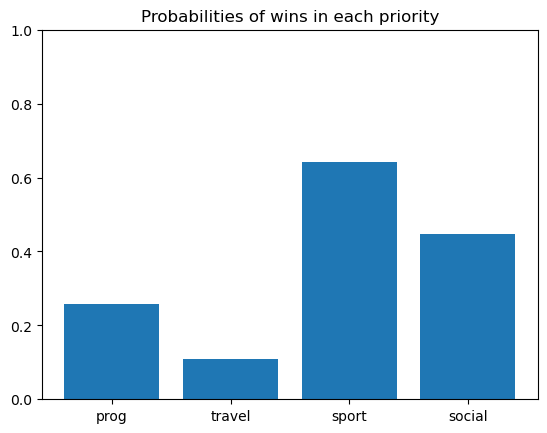

In [7]:
fig, ax = plt.subplots()
plt.ylim(0, 1)
ax.bar(["prog", "travel", "sport", "social"], probabilities["p"][2:])
plt.title('Probabilities of wins in each priority', fontsize=12)

# Conditional probabilities

We are going to calculate `P(priority|has_awesome_win)`: probabilities of getting a win in each priority, given the win was awesome.

We'll start with counting those days that have "awesome wins".

In [8]:
rows_with_awesome_wins = df.loc[df["has_awesome_win"] == 1]
days_with_awesome_wins = rows_with_awesome_wins.shape[0]
days_with_awesome_wins

101

Let's remind us what the unconditional probabilities `P(priority)` were, for each of the priorities:

In [9]:
probabilities[2:]

,p
prog,0.257534
travel,0.109589
sport,0.641096
social,0.446575


Now, we'll calculate the priorities, conditioned on awesome win days:

In [10]:
cond_probabilities = rows_with_awesome_wins[["prog", "travel", "sport", "social"]].sum().to_frame(name="p") / days_with_awesome_wins
cond_probabilities

,p
prog,0.188119
travel,0.267327
sport,0.712871
social,0.554455


Clearly, the conditional probabilities are quite different from unconditional ones. Let's see it visually:

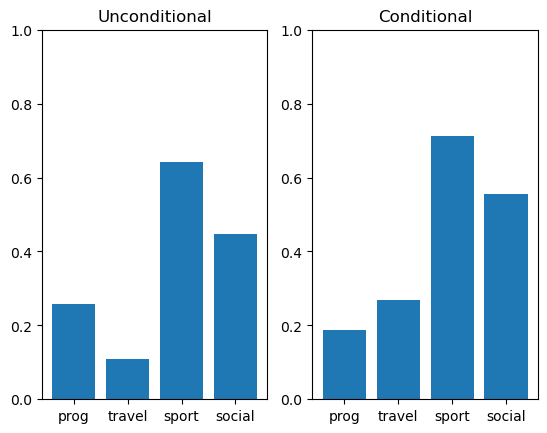

In [11]:
plt.subplot(1, 2, 1)
plt.bar(["prog", "travel", "sport", "social"], probabilities["p"][2:])
plt.ylim(0, 1)
plt.title('Unconditional', fontsize=12)
plt.subplot(1, 2, 2)
plt.bar(["prog", "travel", "sport", "social"], cond_probabilities["p"])
plt.ylim(0, 1)
plt.title('Conditional', fontsize=12)
plt.show()

So, I much more likely to travel or being social when I have a day with an "awesome win".

We could make a hypothesis that "travelling leads to an awesome win".
Let's find `P(has_awesome_win|travel)`:

In [12]:
rows_with_travel = df.loc[df["travel"] == 1]
days_with_travel = rows_with_travel.shape[0]
days_with_travel

40

In [13]:
probability_of_awesome_win_when_traveling = rows_with_travel[["has_awesome_win"]].sum().to_frame(name="p") / days_with_travel
probability_of_awesome_win_when_traveling

,p
has_awesome_win,0.675


In face, the probability of having an awesome win goes from `0.28` to `0.68` on the days I travel! I should travel more!

# Testing for independence

Events `A` and `B` are independent if `P(B|A) = P(B)`.

We have already seen that having an awesome win is NOT independent of having a win related to travel.

Let's now consider events `social` and `sport`, and check whether `P(sport|social) = P(sport)`.

In [14]:
rows_with_social = df.loc[df["social"] == 1]
days_with_social = rows_with_social.shape[0]
days_with_social

163

In [15]:
probability_of_sport_when_social = rows_with_social[["sport"]].sum().to_frame(name="p") / days_with_social
probability_of_sport_when_social

,p
sport,0.723926


As we have seen before, `P(sport) = 0.64`, however, `P(sport|social) = 0.72`.
Looks like, if you know I've been social, it may suggest I was doing some sports!

# Correlation

Let's explore the correlation between different variables.

In [16]:
def plot_correlation(df):
    f = plt.figure(figsize=(10, 8))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=8, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=12)
    plt.title('Correlation Matrix', fontsize=12)

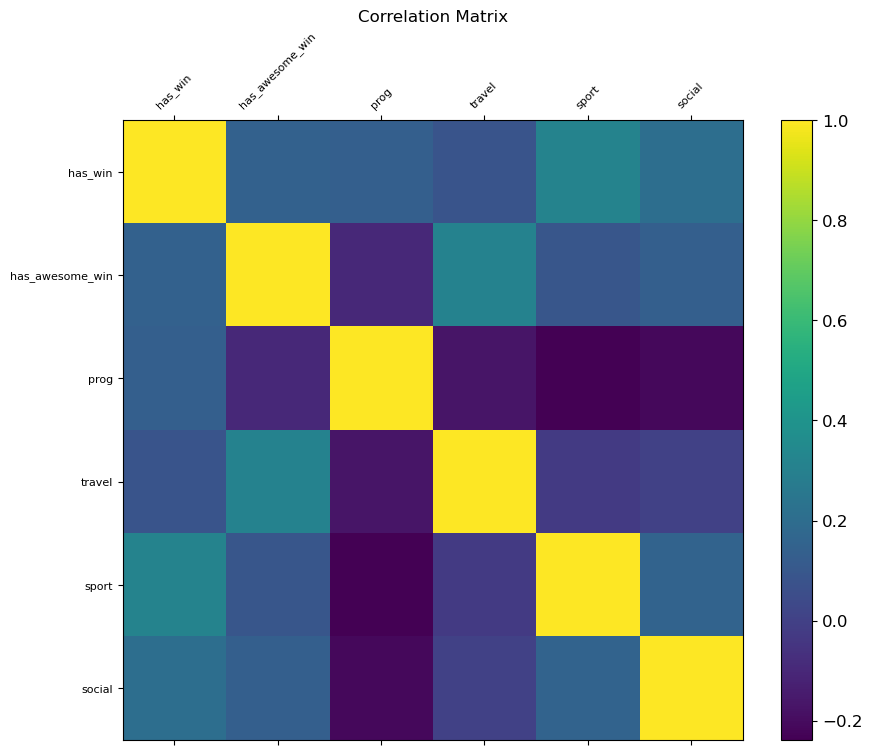

In [17]:
features = df[["has_win", "has_awesome_win", "prog", "travel", "sport", "social"]]
plot_correlation(features)

Looks like the most correlated features are:
- "sport" and "has win"
- "travel" and "has awesome win"

The least correlated are:
- "sport" and "prog", which kind of makes sense

# Conclusion

- We have explored the dataset Wins2023, and calculated the probabilities of individual events. The highest probability to get a win is in the priority "sport";
- We have looked at probabilities of wins linked to each of priorities, conditioned on win being awesome. We discovered all the events have shown some degree of dependency on awesome wins, suggesting that certain priorities tend to produce awesome wins more often. Based on that, we made a hypothesis that I should travel more!
- We tested the priorities for independence and found out that being social is more likely to lead to doing some sports;
- Finally, we analyzed the correlation across all features, and found out that having a win in "programming" is mostly unrelated to having a win in "sports". This sounds quite right.
